## Redoing predictions with a transform on each image used for prediction

In [ ]:
# In File Explorer go to 'content' folder and click vertical 3 dots to the right of it, select Upload
!ls

9_effnetb2_data_20_percent_10_epochs.pth  sample_data


In [ ]:
import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"
class_names = ["pizza", "steak", "sushi"]

# Create a new instance of EfficientNet_B2 (the same class as our saved state_dict())
# Note: loading a model will error if the shapes here aren't the same as the saved version
weights_b2 = torchvision.models.EfficientNet_B2_Weights.DEFAULT
model = torchvision.models.efficientnet_b2(weights=weights_b2)

# Modify the classifier head for your specific number of classes (pizza, steak, sushi = 3)
# This needs to be done before loading the state_dict, regardless of the device
in_features = model.classifier[1].in_features                         # Get the number of input features for the classifier layer
model.classifier[1] = torch.nn.Linear(in_features, len(class_names))  # Update the classifier with the correct number of output features

if device == "cuda":
  # Load in the saved state_dict() for gpu
  model.load_state_dict(torch.load(f="9_effnetb2_data_20_percent_10_epochs.pth"))
else:
  """
  The model was trained on the GPU, this loads it on the CPU
  """
  # Load in the saved state_dict() for cpu
  model.load_state_dict(torch.load('9_effnetb2_data_20_percent_10_epochs.pth',
                                   map_location=torch.device('cpu')))  # map all tensors to the CPU

# Move the model to the appropriate device (not needed in this case as we are already on the correct device)
#model.to(device)
print("Model loaded to", device)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 118MB/s]


Model loaded to cpu


In [ ]:
"""
Create the going_modular folder and move in its scripts.
"""
import os

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
  from going_modular import data_setup, engine
  print("going_modular scripts already downloaded.")
except:
  # Get the going_modular scripts
  print("Downloading going_modular scripts...")
  !git clone https://github.com/lanehale/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !rm -rf pytorch-deep-learning
  print("going_modular downloaded.")
  from going_modular import data_setup, engine

print(">!ls going_modular")
!ls going_modular

Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 569, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 569 (delta 135), reused 92 (delta 92), pack-reused 403 (from 1)
Receiving objects: 100% (569/569), 14.52 MiB | 34.50 MiB/s, done.
Resolving deltas: 100% (331/331), done.
going_modular downloaded.
>!ls going_modular
data_setup.py	  get_custom_data.py  pretrained_confmat.py  utils.py
download_data.py  get_data.py	      pretrained_writer.py
engine.py	  model_builder.py    __pycache__
get_any_data.py   predict.py	      train.py


In [ ]:
# Get custom images
!mkdir data
!python going_modular/get_custom_data.py

DownLoading data/cheese-pizza.jpeg...
DownLoading data/pizza-slice.jpeg...
DownLoading data/pizza-slice2.jpeg...
DownLoading data/pizza-sliced.jpeg...
DownLoading data/pizza-sliced2.jpeg...
DownLoading data/pizza-partial-view.jpeg...
DownLoading data/pizza-partial-view2.jpeg...
DownLoading data/pizza-side-view.jpeg...


### Custom image predictions

In [ ]:
from going_modular.utils import pred_and_plot_image
from pathlib import Path

class_names = ["pizza", "steak", "sushi"]
data_path = Path("data")
auto_transforms = weights_b2.transforms()

filenames = [
    "cheese-pizza.jpeg",
    "pizza-slice.jpeg",
    "pizza-slice2.jpeg",
    "pizza-sliced.jpeg",
    "pizza-sliced2.jpeg",
    "pizza-partial-view.jpeg",
    "pizza-partial-view2.jpeg",
    "pizza-side-view.jpeg"
]

for f in filenames:
  # Set custom image path
  custom_image_path = data_path / f
  # Predict on custom image
  pred_and_plot_image(model=model,
                      image_path=custom_image_path,
                      class_names=class_names,
                      transform=auto_transforms,
                      device=device,
                      image_size=(224, 224))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Download 20 percent training data
from going_modular import download_data

data_20_percent_path = download_data.from_path(from_path="pizza_steak_sushi_20_percent.zip", image_dir="pizza_steak_sushi_20_percent")

# Build a list of all test images
test_dir_20 = data_20_percent_path / "test"
test_image_path_list_20 = list(Path(test_dir_20).glob("*/*.jpg"))

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza_steak_sushi_20_percent data...
>!ls data/pizza_steak_sushi_20_percent
test
train



### Predictions on same five test images from part 1

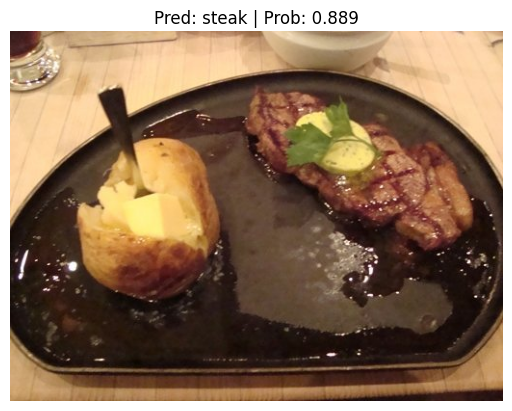

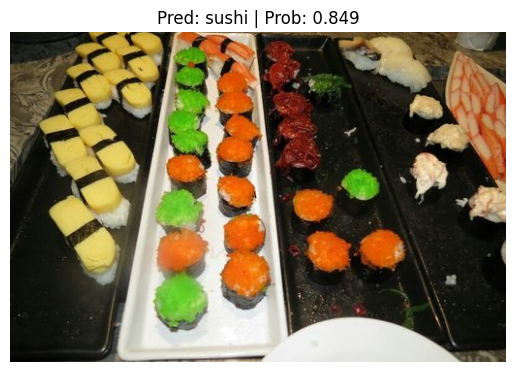

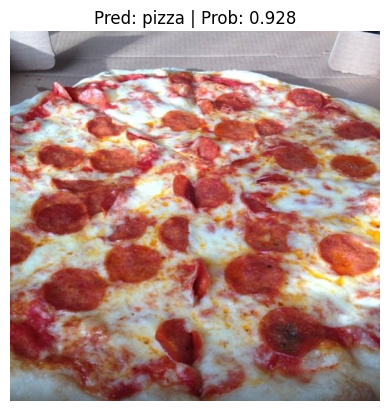

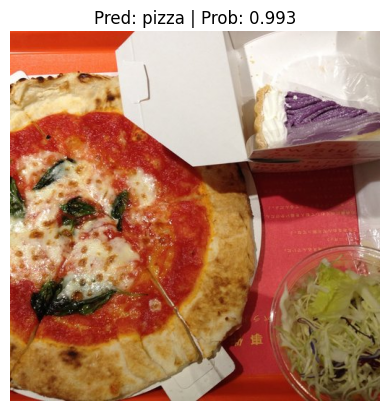

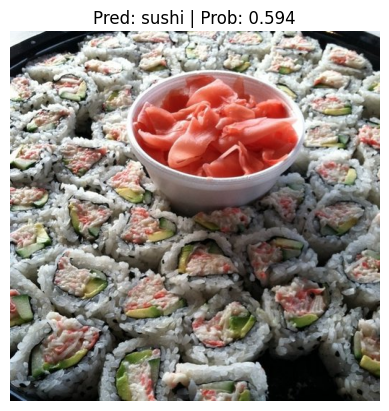

In [ ]:
# Predict on same 5 images that had bad predictions because of no transforms
from going_modular.utils import pred_and_plot_image

five_image_paths = [
    "data/pizza_steak_sushi_20_percent/test/steak/550687.jpg",
    "data/pizza_steak_sushi_20_percent/test/sushi/2352914.jpg",
    "data/pizza_steak_sushi_20_percent/test/pizza/2111981.jpg",
    "data/pizza_steak_sushi_20_percent/test/pizza/3497151.jpg",
    "data/pizza_steak_sushi_20_percent/test/sushi/1683426.jpg",
]

# Iterate through test image paths, make predictions on them and plot them
for image_path in five_image_paths:
  pred_and_plot_image(model=model,
                      image_path=image_path,
                      class_names=class_names,
                      transform=auto_transforms,
                      device=device,
                      image_size=(224, 224))

### Predictions on five new random images

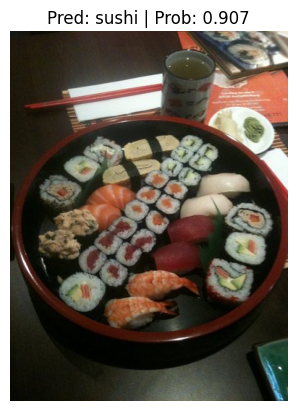

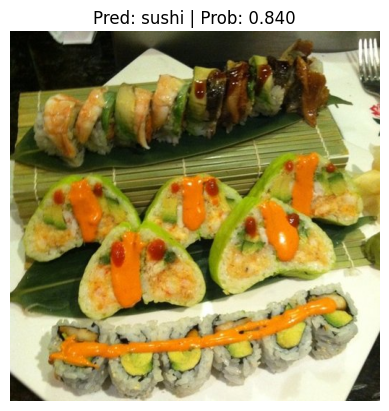

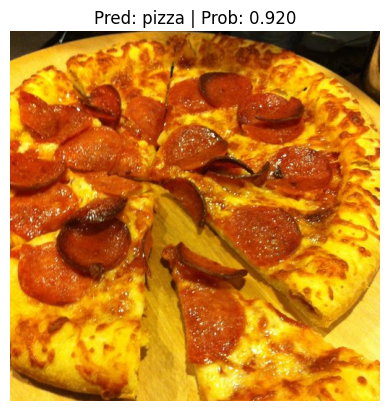

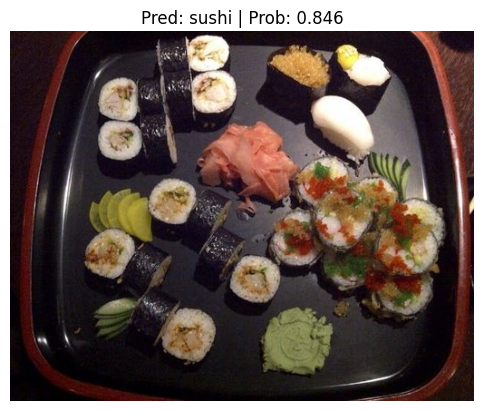

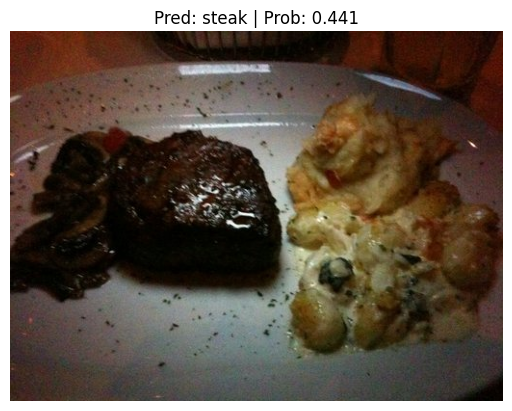

In [ ]:
# Predict on a random sample of images
from going_modular.utils import pred_and_plot_image
import random

# Get a random list of 5 images from 20% test set
random_image_paths = random.sample(test_image_path_list_20, k=5)

# Iterate through random test image paths, make predictions on them and plot them
for image_path in random_image_paths:
  pred_and_plot_image(model=model,
                      image_path=image_path,
                      class_names=class_names,
                      transform=auto_transforms,
                      device=device,
                      image_size=(224, 224))